In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle/

In [ ]:
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                             title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                             9KB  2022-10-06 08:55:25          13459        418  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset      11KB  2022-09-30 04:05:11          10553        330  1.0              
thedevastator/240000-household-electricity-consumption-records  Household Electricity Consumption            3MB  2022-10-24 01:22:40            920         28  1.0              
akshaydattatraykhare/data-for-admission-in-the-university       Data for Admission in the University     

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 611M/612M [00:23<00:00, 29.7MB/s]
100% 612M/612M [00:23<00:00, 27.2MB/s]


In [ ]:
! unzip /content/gtsrb-german-traffic-sign.zip -d TSR_data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: TSR_data/train/5/00005_00053_00010.png  
  inflating: TSR_data/train/5/00005_00053_00011.png  
  inflating: TSR_data/train/5/00005_00053_00012.png  
  inflating: TSR_data/train/5/00005_00053_00013.png  
  inflating: TSR_data/train/5/00005_00053_00014.png  
  inflating: TSR_data/train/5/00005_00053_00015.png  
  inflating: TSR_data/train/5/00005_00053_00016.png  
  inflating: TSR_data/train/5/00005_00053_00017.png  
  inflating: TSR_data/train/5/00005_00053_00018.png  
  inflating: TSR_data/train/5/00005_00053_00019.png  
  inflating: TSR_data/train/5/00005_00053_00020.png  
  inflating: TSR_data/train/5/00005_00053_00021.png  
  inflating: TSR_data/train/5/00005_00053_00022.png  
  inflating: TSR_data/train/5/00005_00053_00023.png  
  inflating: TSR_data/train/5/00005_00053_00024.png  
  inflating: TSR_data/train/5/00005_00053_00025.png  
  inflating: TSR_data/train/5/00005_00053_00026.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [ ]:
data = []
labels = []
classes = 43
os.chdir('/content/drive/MyDrive/kaggle/TSR_data')
cur_path =os.getcwd()

#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
#shuffling thee data so the process of learning will be more complete
s=np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data=data[s]
labels=labels[s]
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
(31367, 43) (7842, 43)


In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 131s 131ms/step - loss: 1.1339 - accuracy: 0.6781 - val_loss: 0.1138 - val_accuracy: 0.9741
Epoch 2/15
981/981 [==============================] - 138s 141ms/step - loss: 0.2121 - accuracy: 0.9362 - val_loss: 0.0506 - val_accuracy: 0.9893
Epoch 3/15
981/981 [==============================] - 130s 133ms/step - loss: 0.1278 - accuracy: 0.9627 - val_loss: 0.0460 - val_accuracy: 0.9922
Epoch 4/15
981/981 [==============================] - 130s 133ms/step - loss: 0.0974 - accuracy: 0.9712 - val_loss: 0.0307 - val_accuracy: 0.9929
Epoch 5/15
981/981 [==============================] - 130s 132ms/step - loss: 0.0800 - accuracy: 0.9760 - val_loss: 0.0202 - val_accuracy: 0.9945
Epoch 6/15
981/981 [==============================] - 126s 129ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.0196 - val_accuracy: 0.9948
Epoch 7/15
981/981 [==============================] - 134s 136ms/step - loss: 0.0586 - accuracy: 0.9826 - val_loss: 0.0191 -

In [ ]:
from tensorflow.keras.models import model_from_json
model_in_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_in_json)

In [ ]:
model_file = open('model.json','r')
json_model = model_file.read()
model2 = model_from_json(json_model)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 189 kB 27.5 MB/s 
     |████████████████████████████████| 578.0 MB 10 kB/s 
     |████████████████████████████████| 16.0 MB 24.1 MB/s 
     |████████████████████████████████| 40 kB 5.7 MB/s 
     |████████████████████████████████| 237 kB 53.6 MB/s 
     |████████████████████████████████| 8.3 MB 36.4 MB/s 
     |████████████████████████████████| 145 kB 50.0 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
     |████████████████████████████████| 1.7 MB 22.8 MB/s 
     |████████████████████████████████| 5.9 MB 26.1 MB/s 
     |████████████████████████████████| 438 kB 52.4 MB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
    

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'models')

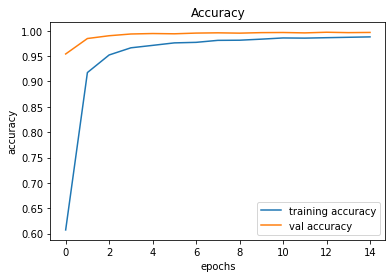

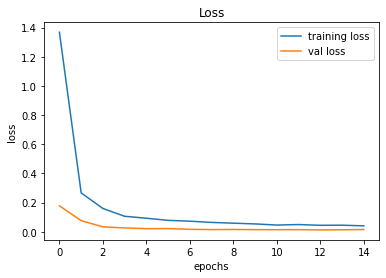

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255

predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))



import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/TSR_data/train/1/00001_00000_00029.png')
cv2_imshow(img)